# Vehile Dataset

This dataset contains information about used cars.

[Vehile dataset on Kaggle](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/?select=car+details+v4.csv)

[Helpers](https://www.kaggle.com/code/lakshman17/carpricepred-using-car-dekho-csv)

# Assumption

The price of the car will be determined based on other features.
  - The year of production can be converted into age by subtracting the year of production with the current year
  - We will not need the car model name for training

## Import libraries

In [42]:
# Data Processing
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Others
import datetime

## Load data

In [2]:
df = pd.read_csv('../datasets/Vehile/CAR DETAILS FROM CAR DEKHO.csv')

## Informations

This section presents information about the dataset

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

We note that there is no missing values.

In [6]:
df["owner"].value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [7]:
df["fuel"].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [8]:
df["transmission"].value_counts()

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

In [9]:
df["seller_type"].value_counts()

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

In [10]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [11]:
df.describe(include='number')

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [12]:
df.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,4340,4340,4340,4340,4340
unique,1491,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,69,2153,3244,3892,2832


## Plotting

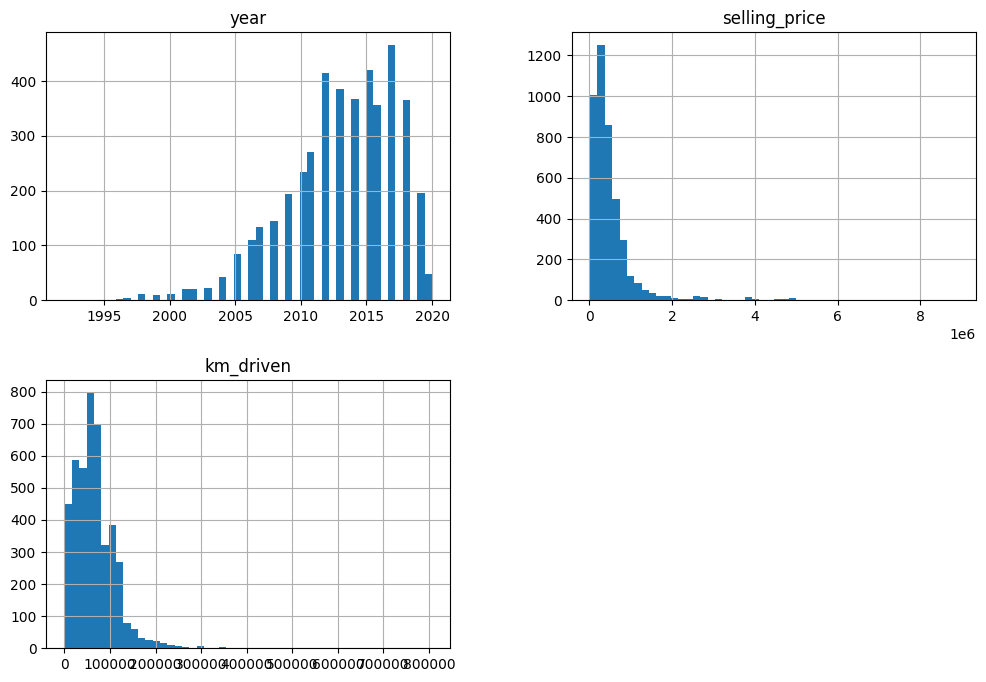

In [13]:
df.hist(bins=50, figsize=((12, 8)))
plt.show()

<Axes: xlabel='owner', ylabel='selling_price'>

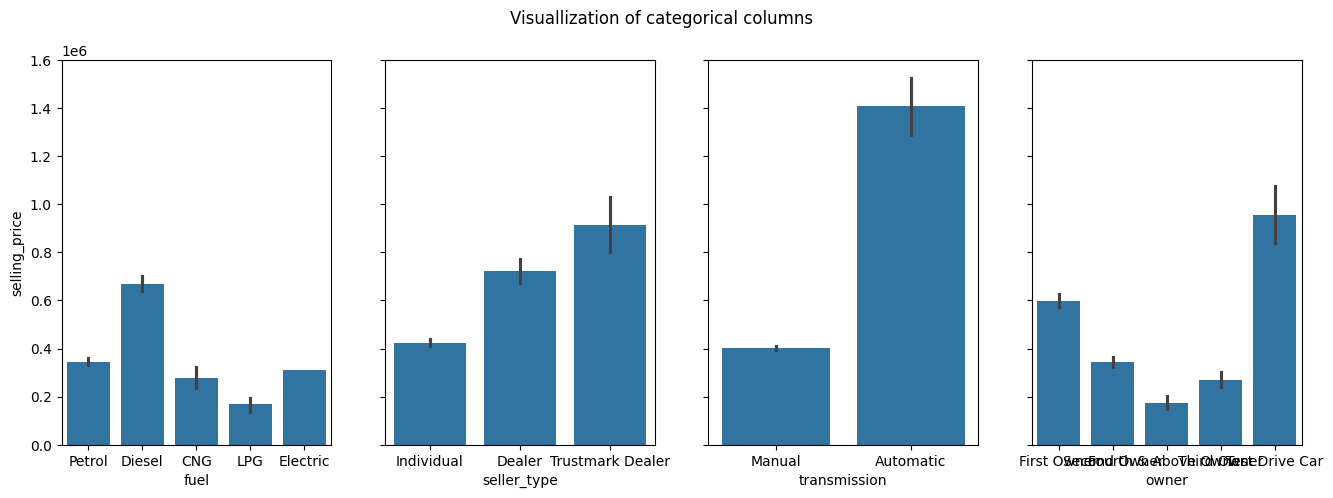

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=True)
fig.suptitle('Visuallization of categorical columns')

# Fuel_Type
sns.barplot(x = 'fuel', y = 'selling_price', data = df, ax = axes[0])

# Seller_Type
sns.barplot(x = 'seller_type', y = 'selling_price', data = df, ax = axes[1])

# Transmission
sns.barplot(x = 'transmission', y = 'selling_price', data = df, ax = axes[2])

# Owner
sns.barplot(x = 'owner', y = 'selling_price', data = df, ax = axes[3])

<Axes: xlabel='km_driven', ylabel='selling_price'>

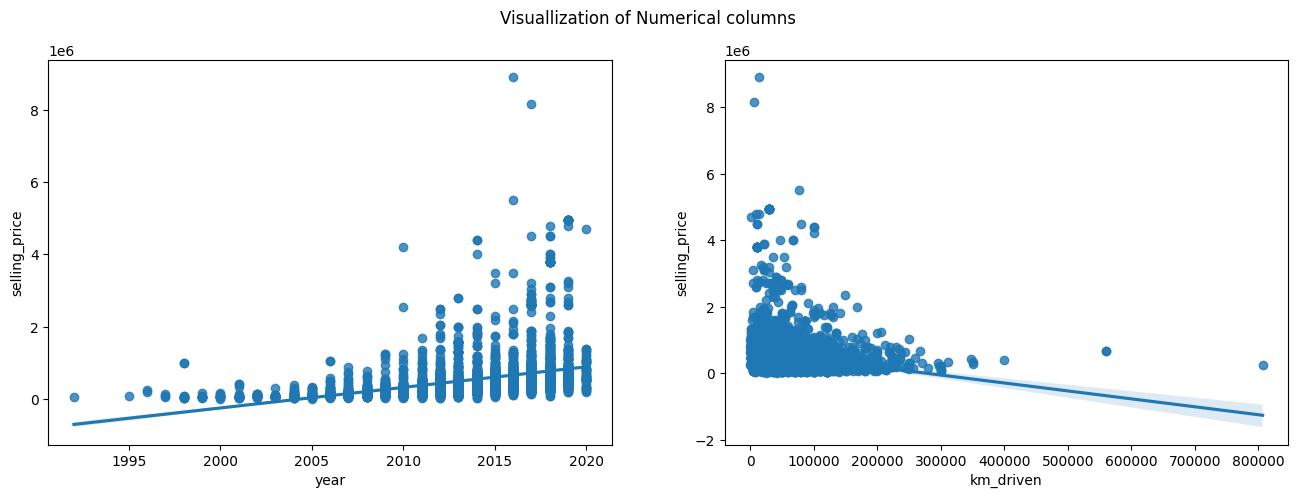

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (16,5))
fig.suptitle('Visuallization of Numerical columns')

sns.regplot(x = 'year', y = 'selling_price', data = df, ax = axes[0])
sns.regplot(x = 'km_driven', y = 'selling_price', data = df, ax = axes[1])


<Axes: xlabel='km_driven'>

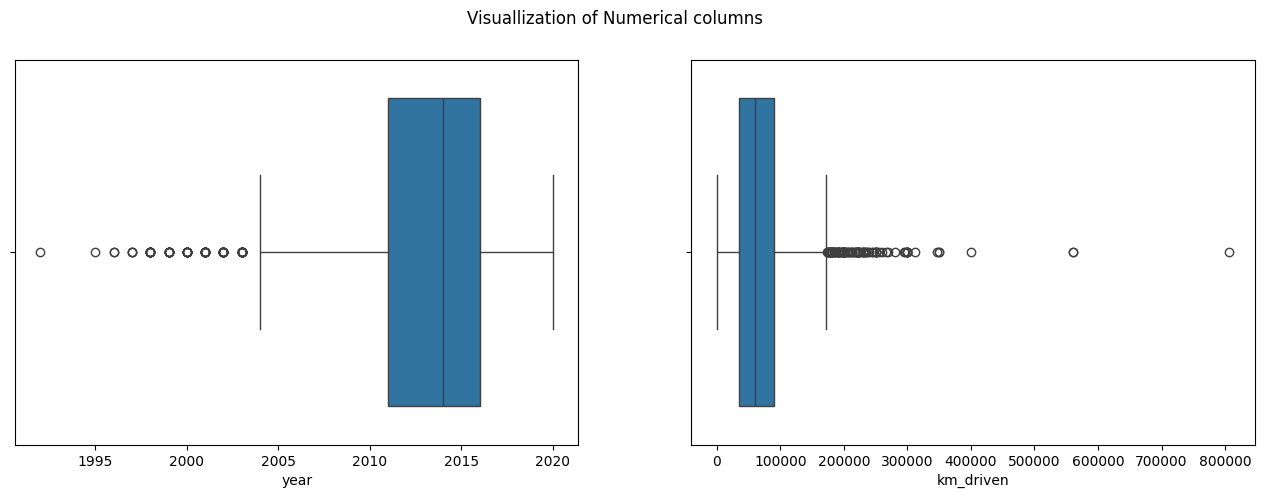

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (16,5))
fig.suptitle('Visuallization of Numerical columns')

sns.boxplot(x = 'year', data = df, ax = axes[0])
sns.boxplot(x = 'km_driven', data = df, ax = axes[1])

## Preprocessing

This section presents data preprocessing, including the removal of unnessesary features, categorial encoders

Firstly we can remove column named "name" (car model names)

In [17]:
df.drop(columns=['name'], axis=1, inplace=True)

Change "year" column values to age

In [18]:
# Current year
actual_year = datetime.date.today()
actual_year = actual_year.year

df.insert(0, "age", actual_year - df["year"])

df.drop("year", axis=1, inplace=True)

### Encoding the Categorical Data

In [19]:
owner_encoded_values = {'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5}

In [20]:
df = df.replace(owner_encoded_values)

In [21]:
df_enc = pd.get_dummies(df, drop_first=True)

In [22]:
df_enc.head()

,age,selling_price,km_driven,owner,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,16,60000,70000,1,False,False,False,True,True,False,True
1,16,135000,50000,1,False,False,False,True,True,False,True
2,11,600000,100000,1,True,False,False,False,True,False,True
3,6,250000,46000,1,False,False,False,True,True,False,True
4,9,450000,141000,2,True,False,False,False,True,False,True


## Correlation map

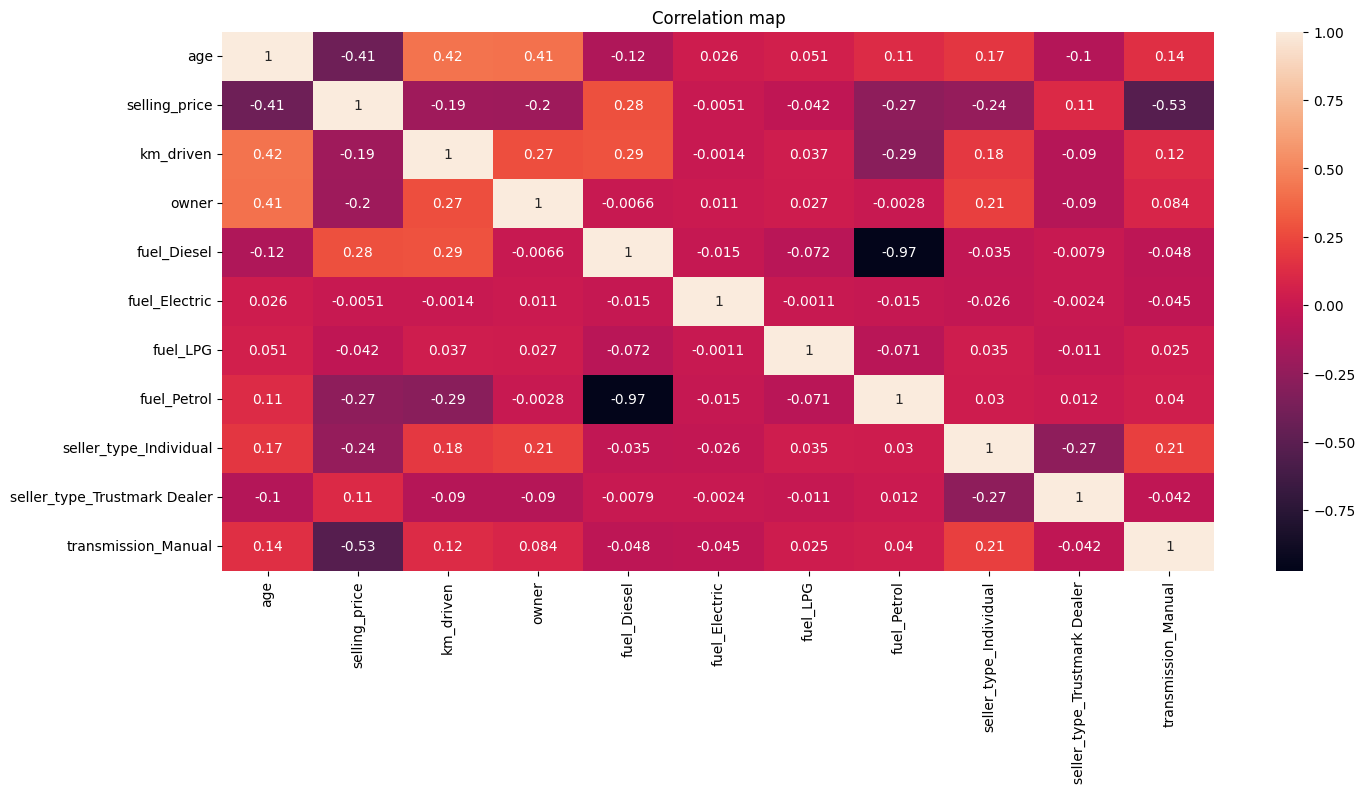

In [23]:
plt.figure(figsize = (16,7))
sns.heatmap(df_enc.corr(), annot = True)
plt.title('Correlation map')
plt.show()

## Train and Test Data

In [26]:
features = df_enc.columns.tolist()

In [27]:
print(features)

['age', 'selling_price', 'km_driven', 'owner', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Manual']


In [28]:
features.remove('selling_price')

In [35]:
X = df_enc[features]
y = df_enc["selling_price"]

In [36]:
X.head()

,age,km_driven,owner,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,16,70000,1,False,False,False,True,True,False,True
1,16,50000,1,False,False,False,True,True,False,True
2,11,100000,1,True,False,False,False,True,False,True
3,6,46000,1,False,False,False,True,True,False,True
4,9,141000,2,True,False,False,False,True,False,True


In [38]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train.head()

,age,km_driven,owner,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
227,6,20000,1,True,False,False,False,True,False,True
964,5,50000,1,True,False,False,False,True,False,True
2045,10,25000,2,False,False,False,True,True,False,True
1025,12,70000,1,True,False,False,False,True,False,True
4242,6,72000,1,True,False,False,False,False,False,True


In [41]:
y_train.head()

227     1500000
964      500000
2045      92800
1025      95000
4242     685000
Name: selling_price, dtype: int64

### Training

In [43]:
rfregressor = RandomForestRegressor()

In [48]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [49]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [50]:
rf_random = RandomizedSearchCV(estimator = rfregressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 4)

In [51]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=4,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [52]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [53]:
predictions=rf_random.predict(X_test)

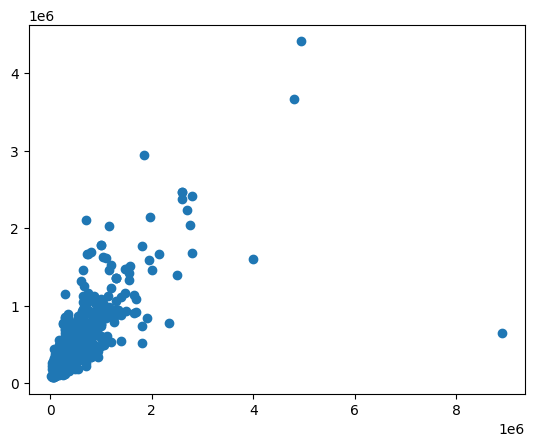

In [54]:
plt.scatter(y_test,predictions)

In [55]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 164414.17640269778
MSE: 142974644743.14505
RMSE: 378119.88144389476


In [56]:
print("R2 score:", metrics.r2_score(y_test, predictions))

R2 score: 0.5314922478935884
